In [ ]:

# 4 th Task 
import numpy as numpie
import matplotlib.pyplot as plott
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import mean_squared_error

def function_for_acquistion(mean, std, epsilon=0.01):
    return mean / (std + epsilon)

# Loading the Data 
x = numpie.load('BO_x.npy')
y = numpie.load('BO_y.npy')

#For the purpose of initial training data Randomly Select 10 Random Samples 
indices = numpie.random.choice(len(x), 10, replace=False)
Train_for_x = x[indices]
Train_for_y= y[indices]

# Considering Rest of the Samples as Candidate Samples 
indices_for_candidate = numpie.array(list(set(range(len(x))) - set(indices)))
X_for_Candidate = x[indices_for_candidate]

# Optimization of Bayesian 
No_of_iterations = 500
Curve_of_bayesian_optimizisation = []
Random_Curv= []

for i in range(No_of_iterations):
    # Training of Gaussain model 
    kernel = RBF(length_scale=1.0)
    Gaussain_Process = GaussianProcessRegressor(kernel=kernel)
    Gaussain_Process.fit(Train_for_x, Train_for_y)

    # Predicting the Standard DEviation and Mean of Candiate samplses
    mean, std = Gaussain_Process.predict(X_for_Candidate, return_std=True)

    # Using Acquistion Fucntion Selecting the Next Samples 
    acquisition_values = function_for_acquistion(mean, std)
    max_index = numpie.argmax(acquisition_values)
    next_x = X_for_Candidate[max_index]
    next_y = y[indices_for_candidate[max_index]]

    
    # Adding Selected Sample to Training Data 
    Train_for_x = numpie.vstack([Train_for_x, next_x])
    Train_for_y= numpie.concatenate([Train_for_y, numpie.array([next_y])])



    # Remove selected sample from candidate pool
    X_for_Candidate = numpie.delete(X_for_Candidate, max_index, axis=0)
    indices_for_candidate = numpie.delete(indices_for_candidate, max_index)

    # Calculate and save f(x) for Bayesian optimization curve
    Curve_of_bayesian_optimizisation.append(next_y)

    # Random selection for random curve
    random_index = numpie.random.choice(len(X_for_Candidate))
    random_y = y[indices_for_candidate[random_index]]
    Random_Curv.append(random_y)


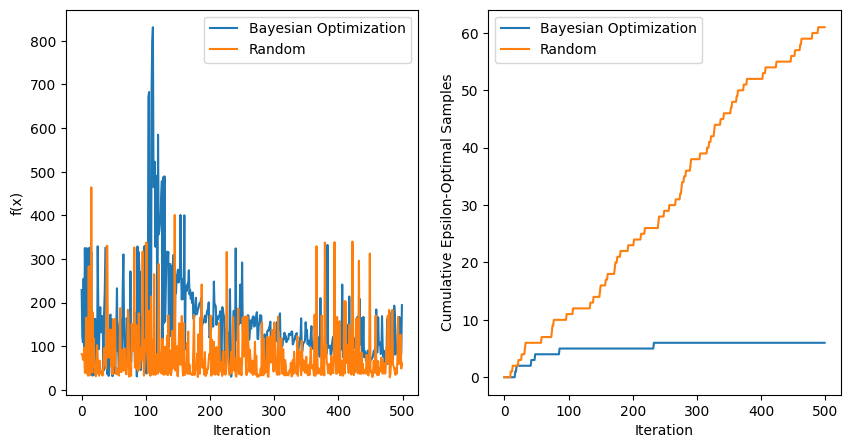

In [9]:

# Calculate cumulative epsilon-optimal sample curve
y_min = numpie.min(y)
epsilon = 0.5

Optimal_Bayesain_Samples = numpie.cumsum(numpie.abs(numpie.array(Curve_of_bayesian_optimizisation) - y_min) / y_min < epsilon)
Optimal_Random_Samples = numpie.cumsum(numpie.abs(numpie.array(Random_Curv) - y_min) / y_min < epsilon)

# Plot results
plott.figure(figsize=(10, 5))

plott.subplot(1, 2, 1)
plott.plot(Curve_of_bayesian_optimizisation, label='Bayesian Optimization')
plott.plot(Random_Curv, label='Random')
plott.xlabel('Iteration')
plott.ylabel('f(x)')
plott.legend()

plott.subplot(1, 2, 2)
plott.plot(Optimal_Bayesain_Samples, label='Bayesian Optimization')
plott.plot(Optimal_Random_Samples, label='Random')
plott.xlabel('Iteration')
plott.ylabel('Cumulative Epsilon-Optimal Samples')
plott.legend()

plott.show()

